<a href="https://colab.research.google.com/github/fl2508/Austin-Project-/blob/master/Exploring_Austin_Gentrification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring Austin Gentrification 

In [1]:
!apt install libspatialindex-dev
!pip install CensusData geopandas earthpy

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex4v5
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
0 upgraded, 3 newly installed, 0 to remove and 7 not upgraded.
Need to get 555 kB of archives.
After this operation, 3,308 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 amd64 1.8.5-5 [219 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-c4v5 amd64 1.8.5-5 [51.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-dev amd64 1.8.5-5 [285 kB]
Fetched 555 kB in 1s (436 kB/s)
Selecting previously unselected package libspatialindex4

For working with Census data, we're doing to use the CensusData package. The CensusData package lets us access ACS data for a number of years, back until 2005 for 5-year estimates. Here is the [documentation](https://jtleider.github.io/censusdata/).

Here's an [example notebook](https://github.com/jtleider/censusdata/blob/master/docs/notebooks/example1.ipynb) which lets us see tract-level estimates for unemployment and high school dropout rates in Cook County, Illinois.


In [0]:
import censusdata  
import pandas as pd
import numpy as np 

You can get a link to all the Census geographies [here](https://jtleider.github.io/censusdata/geographies.html). Census geographies are defined on a hierarchical level. Since we're interested in both the Austin-Red Rock MSA, we can first get all the MSAs, as well as all the tracts in Texas.

In [0]:
## Get all the MSAs in a dictionary object
msas = censusdata.geographies(censusdata.censusgeo([('metropolitan statistical area/micropolitan statistical area', '*')]), 'acs5', 2016)

In [0]:
## Get all the census tracts in Texas
tx_tracts = censusdata.geographies(censusdata.censusgeo([('state', '48'), ('tract', '*')]), 'acs5', 2016)

In [0]:
## Example of the available tract
list(tx_tracts.keys())[0:10]

['Census Tract 234.02, Bell County, Texas',
 'Census Tract 234.03, Bell County, Texas',
 'Census Tract 234.04, Bell County, Texas',
 'Census Tract 235, Bell County, Texas',
 'Census Tract 9800.01, Bell County, Texas',
 'Census Tract 9800.02, Bell County, Texas',
 'Census Tract 9800.03, Bell County, Texas',
 'Census Tract 1101, Bexar County, Texas',
 'Census Tract 1103, Bexar County, Texas',
 'Census Tract 1105, Bexar County, Texas']

In [0]:
## Getting the Austin-Round Rock MSA by the name
msas['Austin-Round Rock, TX Metro Area']

censusgeo((('metropolitan statistical area/micropolitan statistical area', '12420'),))

In [0]:
## Get all the counties tracts within the MSA
msas_counties = censusdata.geographies(censusdata.censusgeo([('state', '48'), ('metropolitan statistical area/micropolitan statistical area', '12420'), ('county', '*')]), 'acs5', 2016)


In [0]:
msas_counties

##list(msas_counties.keys())[0:10]

{'Bastrop County; Austin-Round Rock, TX Metro Area; Texas': censusgeo((('state', '48'), ('metropolitan statistical area/micropolitan statistical area', '12420'), ('county', '021'))),
 'Caldwell County; Austin-Round Rock, TX Metro Area; Texas': censusgeo((('state', '48'), ('metropolitan statistical area/micropolitan statistical area', '12420'), ('county', '055'))),
 'Hays County; Austin-Round Rock, TX Metro Area; Texas': censusgeo((('state', '48'), ('metropolitan statistical area/micropolitan statistical area', '12420'), ('county', '209'))),
 'Travis County; Austin-Round Rock, TX Metro Area; Texas': censusgeo((('state', '48'), ('metropolitan statistical area/micropolitan statistical area', '12420'), ('county', '453'))),
 'Williamson County; Austin-Round Rock, TX Metro Area; Texas': censusgeo((('state', '48'), ('metropolitan statistical area/micropolitan statistical area', '12420'), ('county', '491')))}

In [0]:
## Get unique identifier

county_id = censusdata.geographies(censusdata.censusgeo([('state', '48'), ('county', '*')]), 'acs5', 2016)
county_id ##dictionary with name as key and census geo object
##list(county_id.keys())[0:10]

{'Anderson County, Texas': censusgeo((('state', '48'), ('county', '001'))),
 'Andrews County, Texas': censusgeo((('state', '48'), ('county', '003'))),
 'Angelina County, Texas': censusgeo((('state', '48'), ('county', '005'))),
 'Aransas County, Texas': censusgeo((('state', '48'), ('county', '007'))),
 'Archer County, Texas': censusgeo((('state', '48'), ('county', '009'))),
 'Armstrong County, Texas': censusgeo((('state', '48'), ('county', '011'))),
 'Atascosa County, Texas': censusgeo((('state', '48'), ('county', '013'))),
 'Austin County, Texas': censusgeo((('state', '48'), ('county', '015'))),
 'Bailey County, Texas': censusgeo((('state', '48'), ('county', '017'))),
 'Bandera County, Texas': censusgeo((('state', '48'), ('county', '019'))),
 'Bastrop County, Texas': censusgeo((('state', '48'), ('county', '021'))),
 'Baylor County, Texas': censusgeo((('state', '48'), ('county', '023'))),
 'Bee County, Texas': censusgeo((('state', '48'), ('county', '025'))),
 'Bell County, Texas': censu

In [0]:
#austin_counties = ['021', '055', '209', '453', '491']
austin_counties = ['453']

In [0]:
## Get all the census tracts from the counties 
## state> county> tract

austin_tracts_names = []
for county_id in austin_counties:
  county_tracts = censusdata.geographies(censusdata.censusgeo([('state', '48'), ('county', county_id), ('tract', '*')]), 'acs5', 2016)
  austin_tracts_names.extend(county_tracts.keys())

In [0]:
## Search for all variables by the label 'housing', first 10
censusdata.search('acs5', 2016, 'label', 'white', 'profile')

[('DP05_0032E',
  'ACS DEMOGRAPHIC AND HOUSING ESTIMATES',
  'Estimate!!RACE!!One race!!White'),
 ('DP05_0032PE',
  'ACS DEMOGRAPHIC AND HOUSING ESTIMATES',
  'Percent!!RACE!!One race!!White'),
 ('DP05_0054E',
  'ACS DEMOGRAPHIC AND HOUSING ESTIMATES',
  'Estimate!!RACE!!Two or more races!!White and Black or African American'),
 ('DP05_0054PE',
  'ACS DEMOGRAPHIC AND HOUSING ESTIMATES',
  'Percent!!RACE!!Two or more races!!White and Black or African American'),
 ('DP05_0055E',
  'ACS DEMOGRAPHIC AND HOUSING ESTIMATES',
  'Estimate!!RACE!!Two or more races!!White and American Indian and Alaska Native'),
 ('DP05_0055PE',
  'ACS DEMOGRAPHIC AND HOUSING ESTIMATES',
  'Percent!!RACE!!Two or more races!!White and American Indian and Alaska Native'),
 ('DP05_0056E',
  'ACS DEMOGRAPHIC AND HOUSING ESTIMATES',
  'Estimate!!RACE!!Two or more races!!White and Asian'),
 ('DP05_0056PE',
  'ACS DEMOGRAPHIC AND HOUSING ESTIMATES',
  'Percent!!RACE!!Two or more races!!White and Asian'),
 ('DP05_0059E'

In [0]:

#find all census tracts within the MSA and generate % white of every census tract  

austin_msa = censusdata.download('acs5', 2016,
                             censusdata.censusgeo([('metropolitan statistical area/micropolitan statistical area', '12420')]),
                             ['DP05_0032PE'])

##i think the above one returns the right %white population, turns out there a lot of yt ppl 
##think about: how does construction of hispanic/latino as a race shape this? 
##acs: "The data on race are based on self-identification and the categories on the form generally reflect a social definition of race"

## AH: Yes! Here's a good paper on this -- https://www.annualreviews.org/doi/abs/10.1146/annurev.soc.29.010202.100006

##austin_msa = censusdata.download('acs5', 2016,
                             #censusdata.censusgeo([('state', '48')]),
                             #['B02001_002E', 'B01003_001E'])
# above returns %white for the entire state of tx 

#total population: B01003_001E
#estimate total white alone: B02001_002E
#educational attainment for the population 25 yr+: B15003_001E
austin_msa

Unexpected response (URL: https://api.census.gov/data/2016/acs/acs5?get=NAME,DP05_0032PE&for=metropolitan+statistical+area/micropolitan+statistical+area:12420): error: error: unknown variable 'DP05_0032PE' 


ValueError: ignored

In [0]:
type (white_travis)
#returns data frame is a spreadsheet (rows and cols)

pandas.core.frame.DataFrame

In [0]:
white_travis

,B02001_002E,B01003_001E
"Census Tract 1.01, Travis County, Texas: Summary level: 140, state:48> county:453> tract:000101",3990,4331
"Census Tract 1.02, Travis County, Texas: Summary level: 140, state:48> county:453> tract:000102",2409,2572
"Census Tract 2.03, Travis County, Texas: Summary level: 140, state:48> county:453> tract:000203",1135,1470
"Census Tract 2.04, Travis County, Texas: Summary level: 140, state:48> county:453> tract:000204",2628,3090
"Census Tract 2.05, Travis County, Texas: Summary level: 140, state:48> county:453> tract:000205",3528,4227
...,...,...
"Census Tract 24.34, Travis County, Texas: Summary level: 140, state:48> county:453> tract:002434",1482,1858
"Census Tract 24.35, Travis County, Texas: Summary level: 140, state:48> county:453> tract:002435",5216,7900
"Census Tract 24.36, Travis County, Texas: Summary level: 140, state:48> county:453> tract:002436",2324,2758
"Census Tract 25, Travis County, Texas: Summary level: 140, state:48> county:453> tract:002500",4678,5642


In [0]:
percent_white_travis
#returns series, a column 

Census Tract 1.01, Travis County, Texas: Summary level: 140, state:48> county:453> tract:000101     0.921265
Census Tract 1.02, Travis County, Texas: Summary level: 140, state:48> county:453> tract:000102     0.936625
Census Tract 2.03, Travis County, Texas: Summary level: 140, state:48> county:453> tract:000203     0.772109
Census Tract 2.04, Travis County, Texas: Summary level: 140, state:48> county:453> tract:000204     0.850485
Census Tract 2.05, Travis County, Texas: Summary level: 140, state:48> county:453> tract:000205     0.834634
                                                                                                      ...   
Census Tract 24.34, Travis County, Texas: Summary level: 140, state:48> county:453> tract:002434    0.797632
Census Tract 24.35, Travis County, Texas: Summary level: 140, state:48> county:453> tract:002435    0.660253
Census Tract 24.36, Travis County, Texas: Summary level: 140, state:48> county:453> tract:002436    0.842640
Census Tract 25, Tr

In [0]:
percent_white_travis.mean()

0.7738902959437536

## Calculating percent white per tract

In [0]:
## import pandas
import pandas as pd

## create an empty DataFrame to store results in
df_white = pd.DataFrame()

## calculate the average %white for each tract
for county_id in austin_counties:
  county_white = censusdata.download('acs5', 2016,
                    censusdata.censusgeo([('state', '48'), ('county', county_id), ('tract', '*')]),
                    ['DP05_0032PE'], tabletype = 'profile')
  
  ## this adds the downloaded Census data to single data frame
  df_white = df_white.append(county_white)

In [0]:
## this lets see the whole dataframe
df_white = df_white[df_white['DP05_0032PE'] > 0]

In [0]:
## get a summary of each of these columns
df_white.describe()

## FL: If count = the number of census tracts, 
## why is percent_white not calculating one tract? 
## FL: Why does the min return an empty census tract and 29% white? 

,DP05_0032PE
count,2.180000e+02
mean,-3.058027e+06
std,4.515237e+07
min,-6.666667e+08
25%,6.682500e+01
50%,8.030000e+01
75%,8.637500e+01
max,9.720000e+01


In [0]:
## get tract and county
df_white = df_white.reset_index()
df_white['TRACTCE'] = df_white['index'].apply(lambda x: x.request()['for'].split('tract:')[1])
df_white['COUNTYFP'] = df_white['index'].apply(lambda x: x.request()['in'][-3:])

## Lack of Education

In [0]:
## TODO(Francesca) -- 
## Do this same type of analysis with Lack of College Education
## i.e. Percentage of adults ages 25 and up in the tract who lack a four year 
##      college degree or higher level of education. 

In [0]:
ed_census = censusdata.variable_info.search('acs5', 2016, 'label', 'education', 'profile')
df_census_ed = pd.DataFrame(ed_census)
df_census_ed

,0,1,2
0,DP02PR_0058E,SELECTED SOCIAL CHARACTERISTICS IN PUERTO RICO,Estimate!!EDUCATIONAL ATTAINMENT!!Population 2...
1,DP02PR_0058PE,SELECTED SOCIAL CHARACTERISTICS IN PUERTO RICO,Percent!!EDUCATIONAL ATTAINMENT!!Population 25...
2,DP02PR_0059E,SELECTED SOCIAL CHARACTERISTICS IN PUERTO RICO,Estimate!!EDUCATIONAL ATTAINMENT!!Population 2...
3,DP02PR_0059PE,SELECTED SOCIAL CHARACTERISTICS IN PUERTO RICO,Percent!!EDUCATIONAL ATTAINMENT!!Population 25...
4,DP02PR_0060E,SELECTED SOCIAL CHARACTERISTICS IN PUERTO RICO,Estimate!!EDUCATIONAL ATTAINMENT!!Population 2...
5,DP02PR_0060PE,SELECTED SOCIAL CHARACTERISTICS IN PUERTO RICO,Percent!!EDUCATIONAL ATTAINMENT!!Population 25...
6,DP02PR_0061E,SELECTED SOCIAL CHARACTERISTICS IN PUERTO RICO,Estimate!!EDUCATIONAL ATTAINMENT!!Population 2...
7,DP02PR_0061PE,SELECTED SOCIAL CHARACTERISTICS IN PUERTO RICO,Percent!!EDUCATIONAL ATTAINMENT!!Population 25...
8,DP02PR_0062E,SELECTED SOCIAL CHARACTERISTICS IN PUERTO RICO,Estimate!!EDUCATIONAL ATTAINMENT!!Population 2...
9,DP02PR_0062PE,SELECTED SOCIAL CHARACTERISTICS IN PUERTO RICO,Percent!!EDUCATIONAL ATTAINMENT!!Population 25...


In [0]:
## import pandas
##import pandas as pd

## create an empty DataFrame to store results in
df_education = pd.DataFrame()

## calculate the average %white for each tract
for county_id in austin_counties:
  county_education_profile = censusdata.download('acs5', 2016,
                    censusdata.censusgeo([('state', '48'), ('county', county_id), ('tract', '*')]), 
                    ['DP02_0067PE'], tabletype = 'profile') 
  ## FL: Once I specified the 'profile', I was able to find %bachelors or higher
  ## FL: but when I try to access the estimate of people with %bach or higher,
  ## i get a really weird variable 
  
  ## this adds the downloaded Census data to single data frame
  df_education = df_education.append(county_education_profile)

In [0]:
df_education 

,DP02_0067PE
"Census Tract 9501, Bastrop County, Texas: Summary level: 140, state:48> county:021> tract:950100",18.6
"Census Tract 9502, Bastrop County, Texas: Summary level: 140, state:48> county:021> tract:950200",12.8
"Census Tract 9503, Bastrop County, Texas: Summary level: 140, state:48> county:021> tract:950300",29.9
"Census Tract 9504, Bastrop County, Texas: Summary level: 140, state:48> county:021> tract:950400",23.4
"Census Tract 9505.01, Bastrop County, Texas: Summary level: 140, state:48> county:021> tract:950501",9.5
...,...
"Census Tract 209, Williamson County, Texas: Summary level: 140, state:48> county:491> tract:020900",18.0
"Census Tract 210, Williamson County, Texas: Summary level: 140, state:48> county:491> tract:021000",3.9
"Census Tract 211, Williamson County, Texas: Summary level: 140, state:48> county:491> tract:021100",6.9
"Census Tract 212.01, Williamson County, Texas: Summary level: 140, state:48> county:491> tract:021201",19.4


In [0]:
## filter out < 0
df_education = df_education[df_education['DP02_0067PE'] > 0]

In [0]:
df_education.describe()

,DP02_0067PE
count,348.000000
mean,41.895690
std,21.131427
min,3.900000
25%,23.500000
50%,40.300000
75%,58.050000
max,91.700000


In [0]:
## get the tract
df_education = df_education.reset_index()
df_education['TRACTCE'] = df_education['index'].apply(lambda x: x.request()['for'].split('tract:')[1])

In [0]:
df_education['TRACTCE'].head()

0    950100
1    950200
2    950300
3    950400
4    950501
Name: TRACTCE, dtype: object

In [0]:
## get the county by getting the last three characters in the index string
df_education['COUNTYFP'] = df_education['index'].apply(lambda x: x.request()['in'][-3:])

In [0]:
df_education['COUNTYFP']

0      021
1      021
2      021
3      021
4      021
      ... 
343    491
344    491
345    491
346    491
347    491
Name: COUNTYFP, Length: 348, dtype: object

In [0]:
df_education.head()

,index,DP02_0067PE,TRACTCE,COUNTYFP
0,"Census Tract 9501, Bastrop County, Texas: Summ...",18.6,950100,021
1,"Census Tract 9502, Bastrop County, Texas: Summ...",12.8,950200,021
2,"Census Tract 9503, Bastrop County, Texas: Summ...",29.9,950300,021
3,"Census Tract 9504, Bastrop County, Texas: Summ...",23.4,950400,021
4,"Census Tract 9505.01, Bastrop County, Texas: S...",9.5,950501,021


In [0]:
## From detail:
## "B15003_001E": "EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER",


## From profile: 
## "DP02_0067E": "Estimate!!EDUCATIONAL ATTAINMENT!!Percent bachelor's degree or higher"

## "DP02_0067PE": "Percent!!EDUCATIONAL ATTAINMENT!!Percent bachelor's degree or higher"

## "DP02_0135E": "Estimate!!ANCESTRY!!Total population!!Italian",
    

## Mapping

In [0]:
import os
import matplotlib.pyplot as plt

In [0]:
import geopandas as gpd

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
## load the shapefile
drive_url = '/content/gdrive/My Drive/tl_2016_48_tract/tl_2016_48_tract.shp'
tx_locations = gpd.read_file(drive_url)

In [0]:
## restrict to Austin counties
austin_locations = tx_locations[tx_locations.COUNTYFP.isin(austin_counties)]

In [0]:
austin_locations.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
147,48,453,001603,48453001603,16.03,Census Tract 16.03,G5020,S,2559600,0,+30.2984281,-097.7564434,"POLYGON ((-97.76826 30.29670, -97.76746 30.297..."
148,48,453,001605,48453001605,16.05,Census Tract 16.05,G5020,S,1894186,0,+30.2867710,-097.7605726,"POLYGON ((-97.77165 30.29125, -97.77145 30.291..."
149,48,453,001606,48453001606,16.06,Census Tract 16.06,G5020,S,503773,0,+30.3056732,-097.7608291,"POLYGON ((-97.76486 30.30556, -97.76481 30.305..."
191,48,453,001705,48453001705,17.05,Census Tract 17.05,G5020,S,5341085,0,+30.3697168,-097.7740291,"POLYGON ((-97.79135 30.35929, -97.79126 30.359..."
192,48,453,001706,48453001706,17.06,Census Tract 17.06,G5020,S,2659131,0,+30.3825426,-097.7554827,"POLYGON ((-97.77051 30.38292, -97.77049 30.383..."


In [0]:
## now, merge the location dataset and the education dataset
df_mapdata = austin_locations.merge(df_education)
df_mapdata = df_mapdata.merge(df_white)

In [0]:
df_mapdata.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,index,DP02_0067PE,DP05_0032PE
0,48,453,001603,48453001603,16.03,Census Tract 16.03,G5020,S,2559600,0,+30.2984281,-097.7564434,"POLYGON ((-97.76826 30.29670, -97.76746 30.297...","Census Tract 16.03, Travis County, Texas: Summ...",91.7,92.1
1,48,453,001605,48453001605,16.05,Census Tract 16.05,G5020,S,1894186,0,+30.2867710,-097.7605726,"POLYGON ((-97.77165 30.29125, -97.77145 30.291...","Census Tract 16.05, Travis County, Texas: Summ...",86.1,93.5
2,48,453,001705,48453001705,17.05,Census Tract 17.05,G5020,S,5341085,0,+30.3697168,-097.7740291,"POLYGON ((-97.79135 30.35929, -97.79126 30.359...","Census Tract 17.05, Travis County, Texas: Summ...",77.5,93.2
3,48,453,001706,48453001706,17.06,Census Tract 17.06,G5020,S,2659131,0,+30.3825426,-097.7554827,"POLYGON ((-97.77051 30.38292, -97.77049 30.383...","Census Tract 17.06, Travis County, Texas: Summ...",71.1,85.1
4,48,453,001707,48453001707,17.07,Census Tract 17.07,G5020,S,2795279,0,+30.3727852,-097.7463444,"POLYGON ((-97.75707 30.37191, -97.75686 30.372...","Census Tract 17.07, Travis County, Texas: Summ...",62.9,85.9


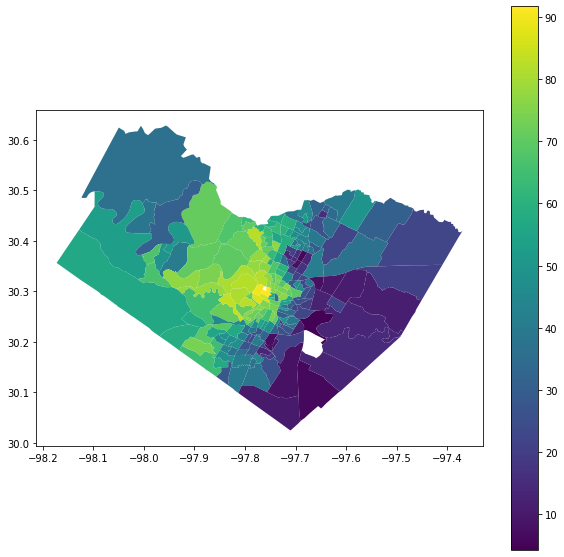

In [0]:
import matplotlib.pyplot as plt
import numpy as np

## percent education over Bachelor's degree
fig, ax = plt.subplots(figsize = (10,10))
df_mapdata.plot(column = 'DP02_0067PE', ax=ax, legend = True)
plt.show()

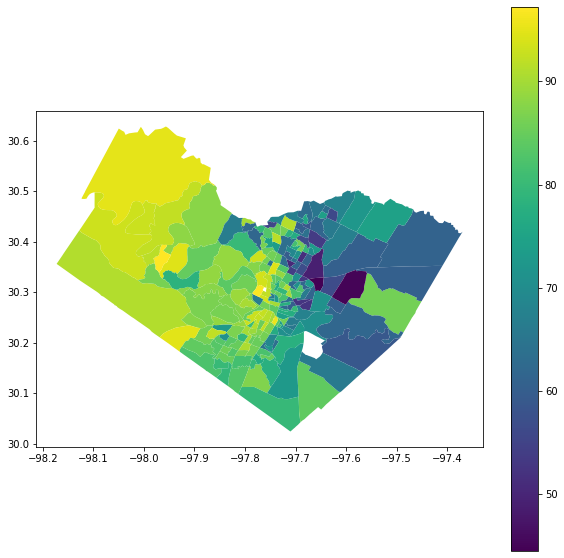

In [0]:
## percent white
fig, ax = plt.subplots(figsize = (10,10))
df_mapdata.plot(column = 'DP05_0032PE', ax=ax, legend = True)
plt.show()